# Calculate velocity errors over stable surfaces (Stable Surface Error) for all velocity maps in a folder

Generates a table with all velocity map parameters, including the stable surface error.

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import fiona
from shapely.geometry import mapping
import subprocess
import rasterio as rio
from rasterio.mask import mask

### Set paths to velocity maps, the stable surface masks (ssm), and a glacier shapefile (UTM projection)

In [7]:
# path to autorift velocity maps:
# autorift_outp = '/Volumes/SURGE_DISK/LO_autorift_output_dt5to60/'
autorift_outp = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/MZ_autorift_output_dt14to60/'
# autorift_outp = '/Users/jukesliu/Documents/TURNER/DATA/VELOCITY_MAPS/output_autoRIFT/'

# set path to folder with the stable surface mask (should have been generated when running custom autoRIFT)
# contains files named ssm_#m.tif
# refvpath = '/Volumes/SURGE_DISK/LO/'
refvpath = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/MZ/'
# refvpath = '/Users/jukesliu/Documents/TURNER/DATA/VELOCITY_MAPS/forAutoRIFT/'
print(os.listdir(refvpath))

# read in glacier shapefile and grab outline as shapes
shp_path = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/MZ/MZ_polygon_UTM42.shp'
# shp_path = '/Users/jukesliu/Documents/TURNER/DATA/shapefiles_gis/Turner_RGI/TG_glims_polygon_UTM7.shp'
with fiona.open(shp_path) as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

['MZ_polygon_UTM42.qmd', 'MZ_polygon_UTM42.shx', 'ssm_polygon.qpj', 'SRTM_1arc_v3_UTM42_clipped_dhdy_200m.tif', 'SRTM_1arc_v3_UTM42_clipped_dhdx_200m.tif', 'MZ_polygon_UTM42.cpg', 'MZ_polygon_UTM42.shp', '.DS_Store', 'SRTM_1arc_v3_UTM42_clipped_200m.tif', 'ssm_polygon.prj', 'MZ_Box_WGS_UTM_43.prj', 'MZ_Box_WGS.geojson', 'LSimages', 'MZ_Box_WGS_UTM_42.prj', 'ssm_200m.tif', 'MZ_Box_WGS.prj', 'MZ_Box_UTM42.prj', 'MZ_polygon_UTM42.dbf', 'Screen Shot 2023-10-24 at 2.34.24 PM.png', 'MZ_polygon_WGS.prj', 'SRTM_1arc_v3_UTM42_clipped_100m.tif', 'MZ_polygon_WGS.dbf', 'ssm_100m.tif', 'MZ_Box_UTM42.dbf', 'MZ_polygon_UTM42.prj', 'itslive-data.zip', 'MZ_Box_WGS_UTM_43.shx', 'MZ_Box_WGS.dbf', 'ssm_polygon.shp', 'ssm_polygon.cpg', 'Figure 1 (4).png', 'MZ_Box_WGS_UTM_42.shx', 'MZ_Box_WGS_UTM_43.shp', 'MZ_itslive_data', 'ssm_polygon.shx', 'SRTM_1arc_v3_UTM42_clipped_dhdx_100m.tif', 'SRTM_1arc_v3_UTM42_clipped_dhdy_100m.tif', 'MZ_Box_WGS.qix', 'MZ_Box_WGS_UTM_42.shp', 'MZ_Box_WGS.shx', 'MZ_Box_WGS_UTM_42

In [8]:
# # reproject certain files 

# for file in os.listdir(autorift_outp):
#     if file.startswith('velocity') and 'S2' in file and 'rp' not in file:
#         os.remove(autorift_outp+file)
        
# #         rp_cmd = 'gdalwarp -s_srs EPSG:32631 -t_srs EPSG:32633 '+autorift_outp+file+' '+autorift_outp+file[:-4]+'_rp.tif'
# #         print(rp_cmd)
        
# #         os.system(rp_cmd)


### Grab important information and Stable Surface Error (SSE) from each velocity map

velocity_20190508_20190609_100m_LS.tif


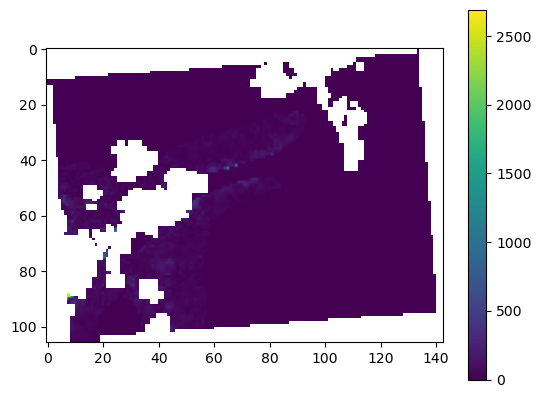

velocity_20200920_20201015_100m_S2.tif


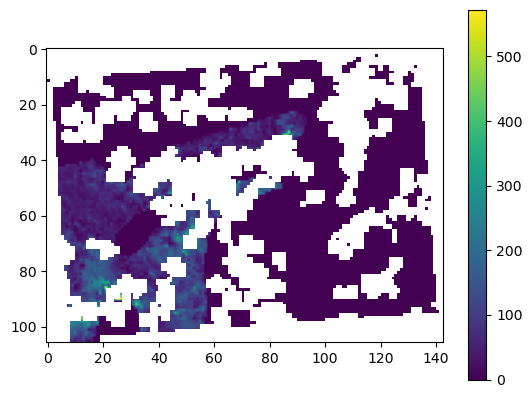

velocity_20210228_20210409_100m_PS.tif


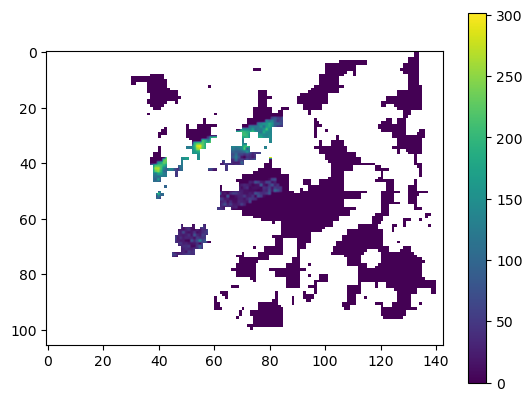

velocity_20211208_20211224_100m_PS.tif


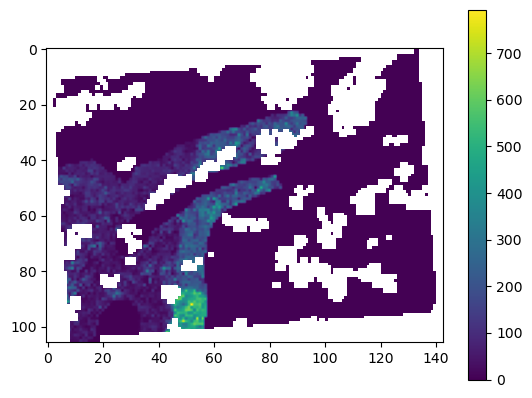

velocity_20220508_20220524_100m_LS.tif


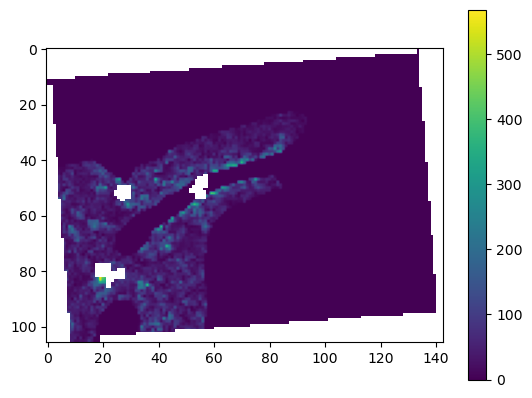

velocity_20200521_20200605_100m_PS.tif


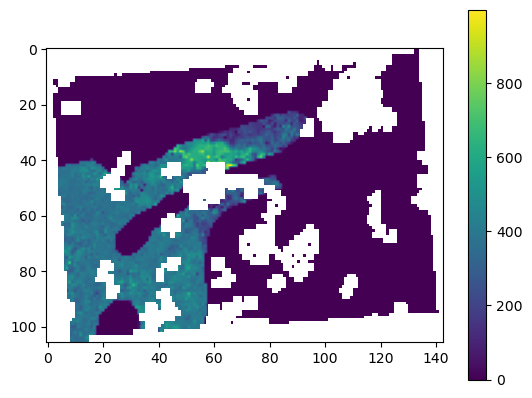

velocity_20210528_20210622_100m_S2.tif


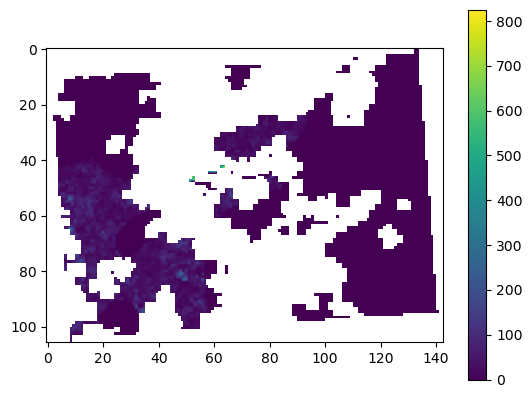

velocity_20210319_20210403_100m_S2.tif


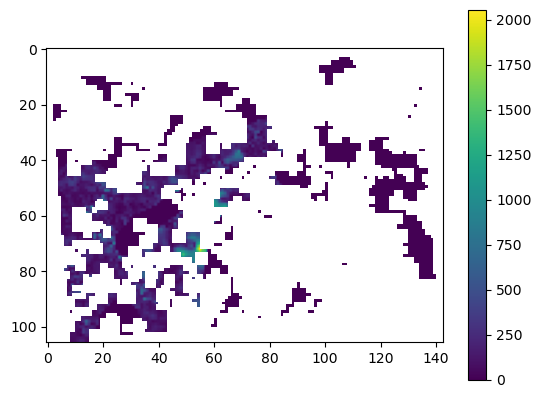

velocity_20190609_20190711_100m_LS.tif


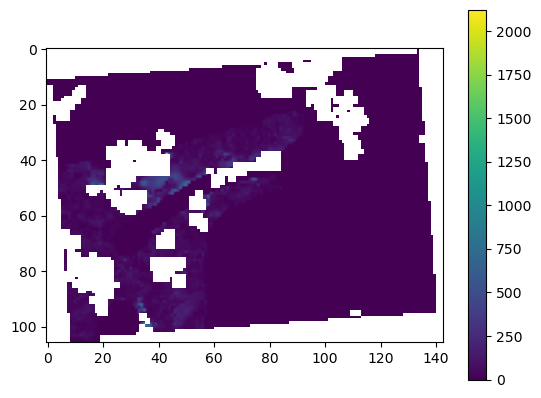

velocity_20220727_20220828_100m_LS.tif


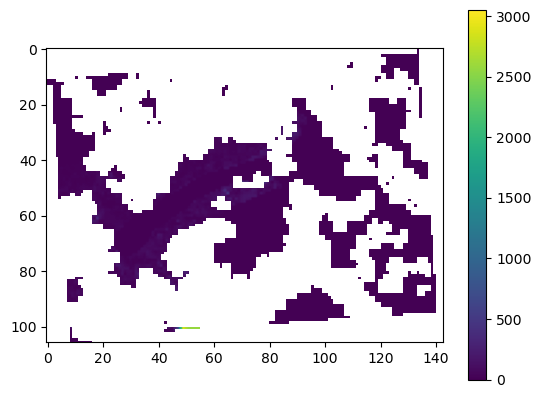

velocity_20201212_20201229_100m_PS.tif


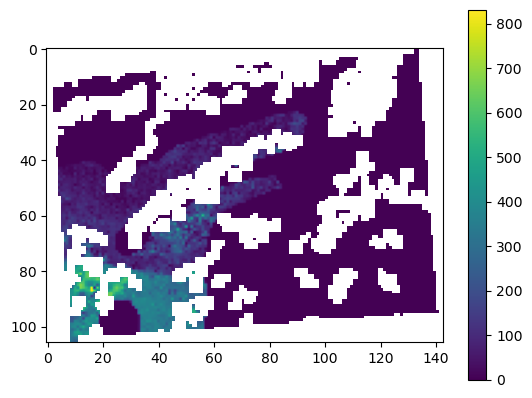

velocity_20211204_20211224_100m_S2.tif


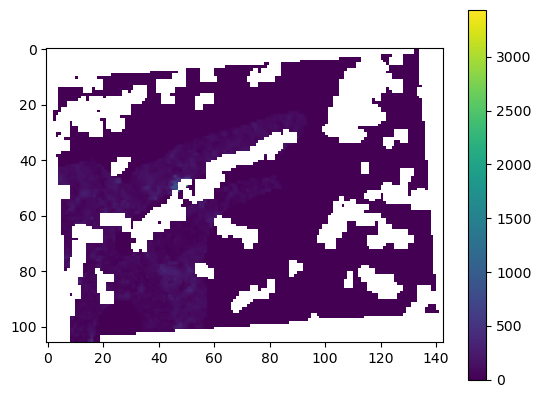

velocity_20210622_20210707_100m_S2.tif


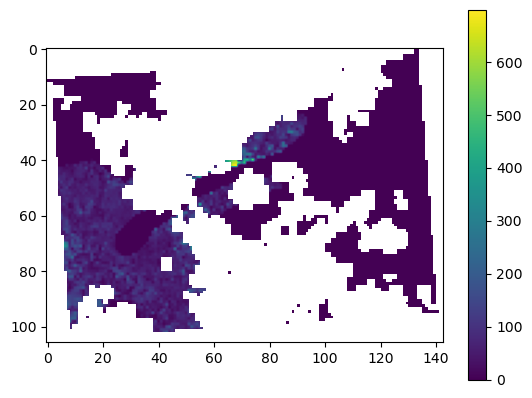

velocity_20200621_20200707_100m_PS.tif


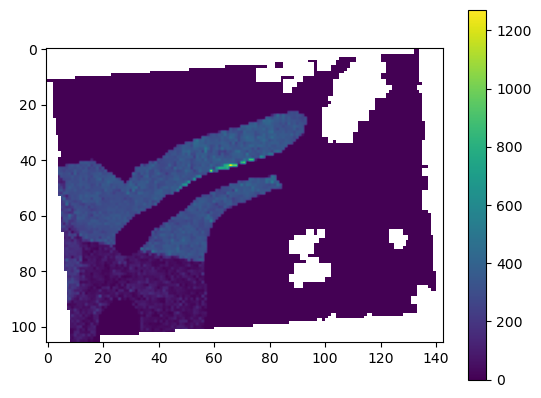

velocity_20210128_20210212_100m_PS.tif


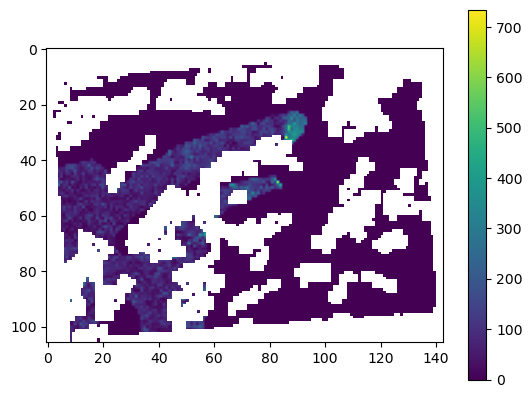

velocity_20210915_20210930_100m_S2.tif


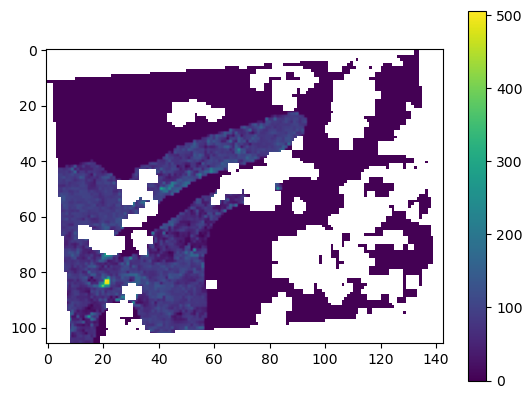

velocity_20221124_20221210_100m_LS.tif


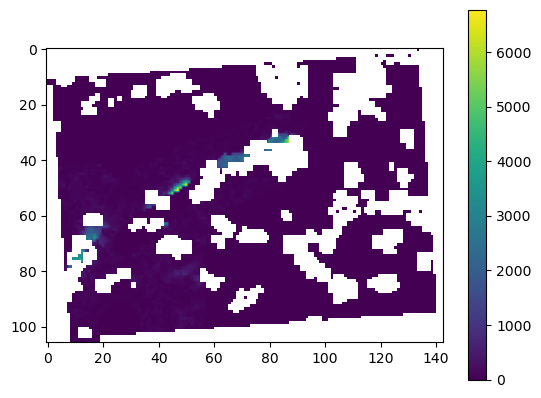

velocity_20201030_20201129_100m_S2.tif


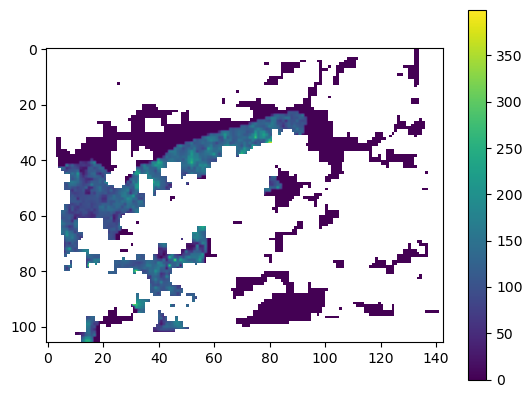

velocity_20190321_20190508_100m_LS.tif


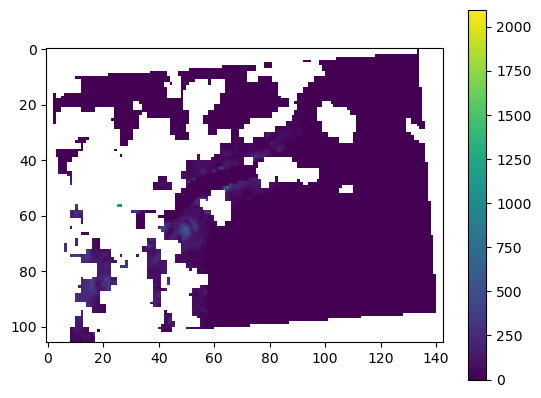

velocity_20200605_20200621_100m_PS.tif


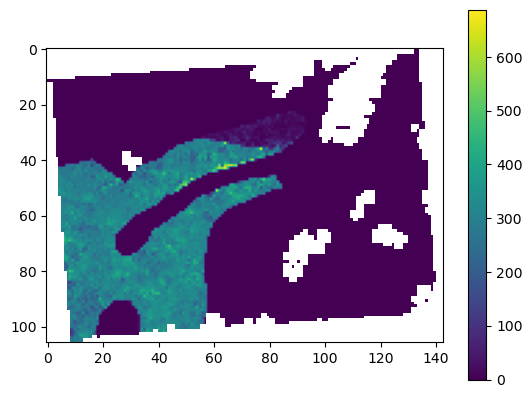

velocity_20200309_20200329_100m_S2.tif


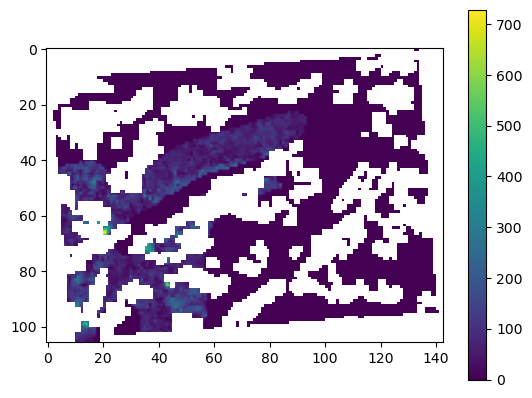

velocity_20220108_20220124_100m_LS.tif


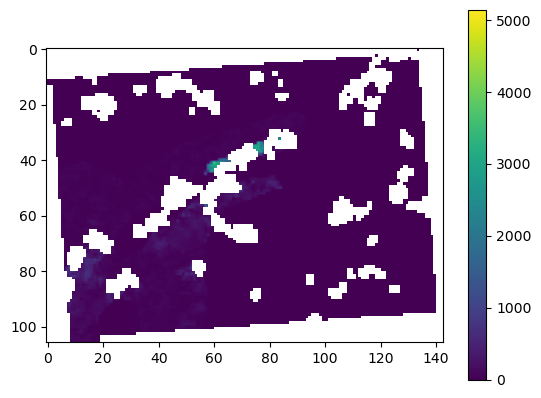

velocity_20210212_20210228_100m_PS.tif


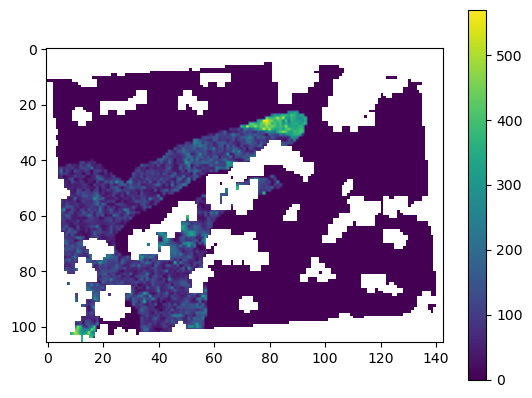

velocity_20200209_20200223_100m_PS.tif


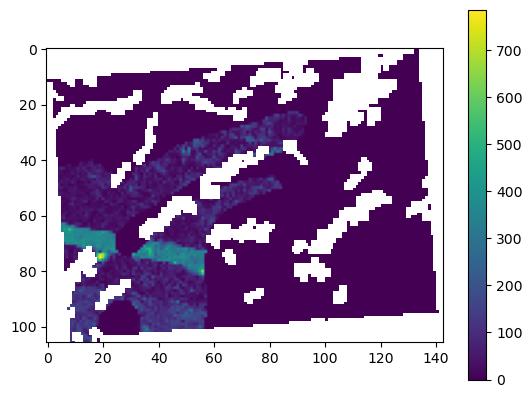

velocity_20210902_20210918_100m_LS.tif


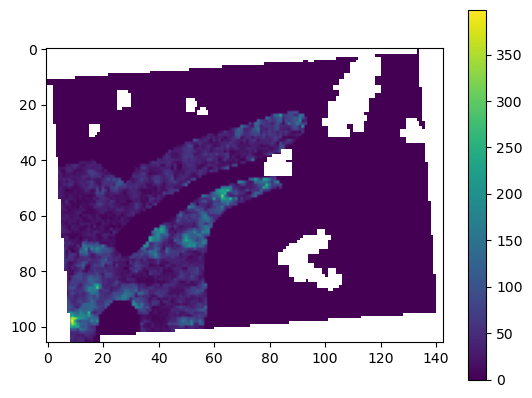

velocity_20200811_20200825_100m_PS.tif


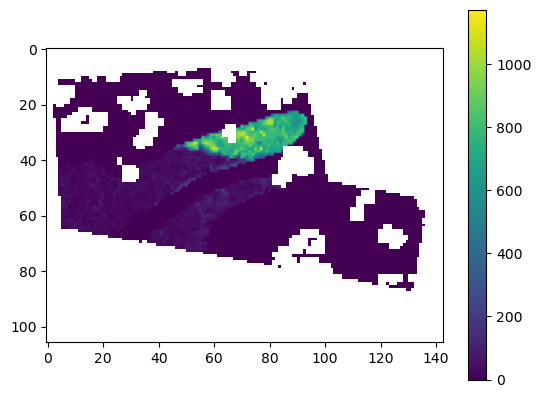

velocity_20211023_20211106_100m_PS.tif


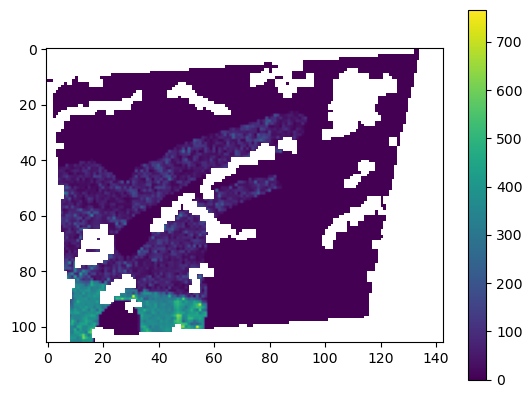

velocity_20210806_20210820_100m_PS.tif


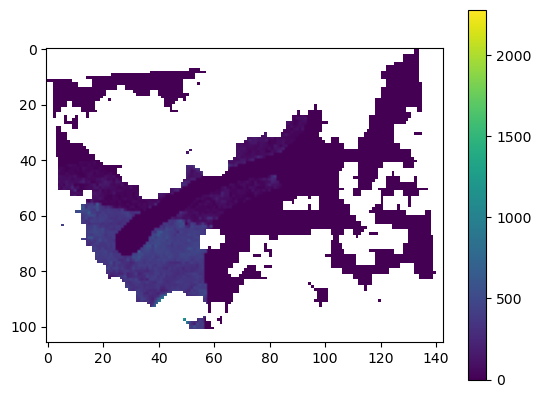

velocity_20211119_20211215_100m_LS.tif


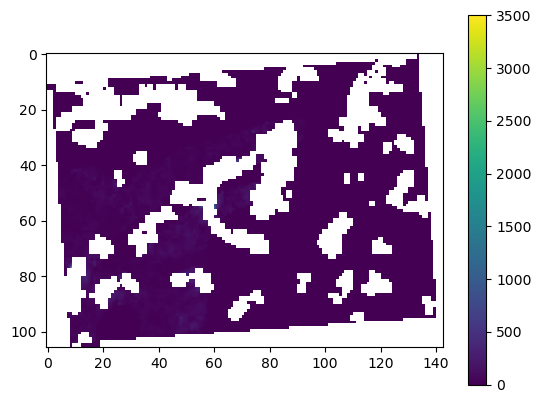

velocity_20200329_20200418_100m_S2.tif


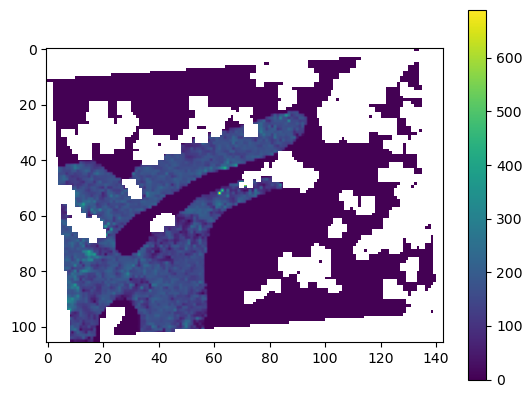

velocity_20210707_20210816_100m_S2.tif


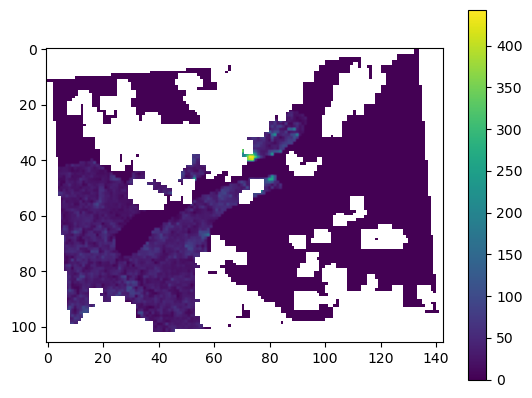

velocity_20211030_20211114_100m_S2.tif


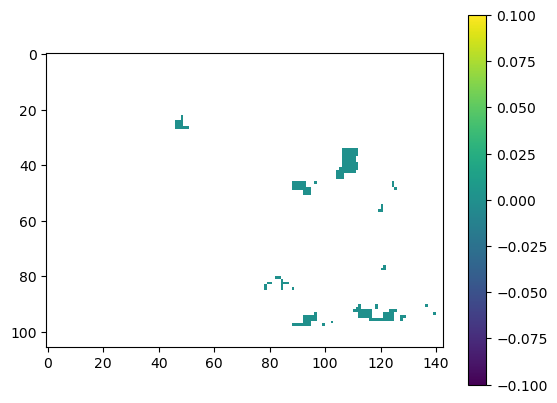

velocity_20191015_20191031_100m_LS.tif


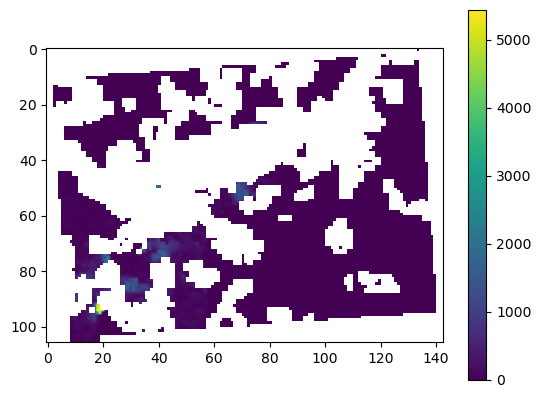

velocity_20210212_20210319_100m_S2.tif


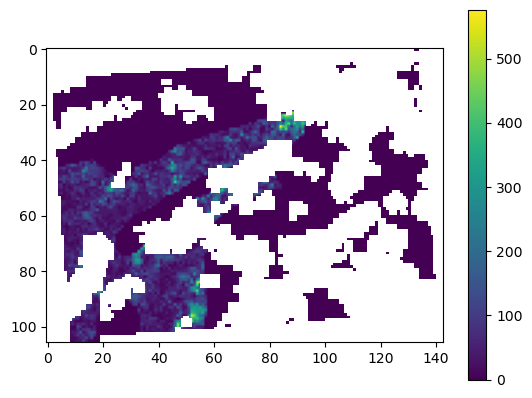

velocity_20200119_20200220_100m_LS.tif


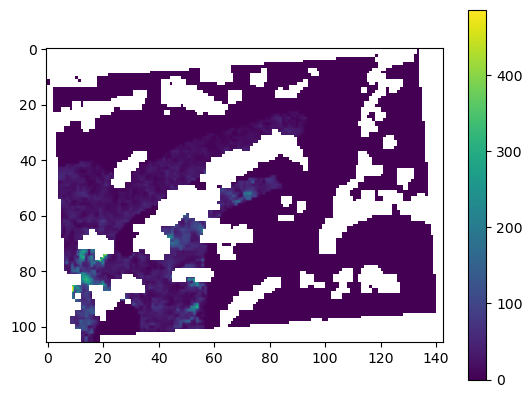

velocity_20200406_20200421_100m_PS.tif


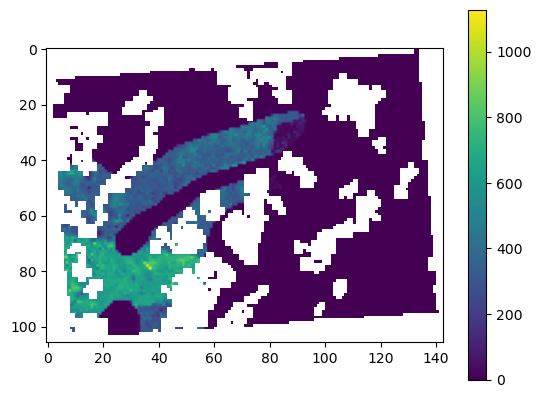

velocity_20200119_20200208_100m_S2.tif


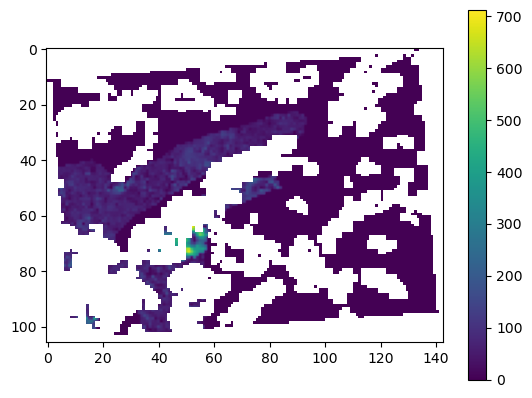

velocity_20210624_20210708_100m_PS.tif


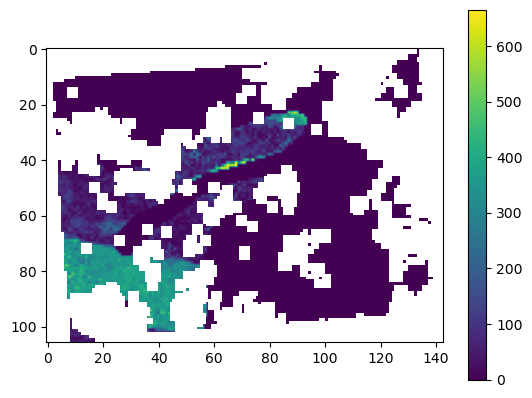

velocity_20221210_20221226_100m_LS.tif


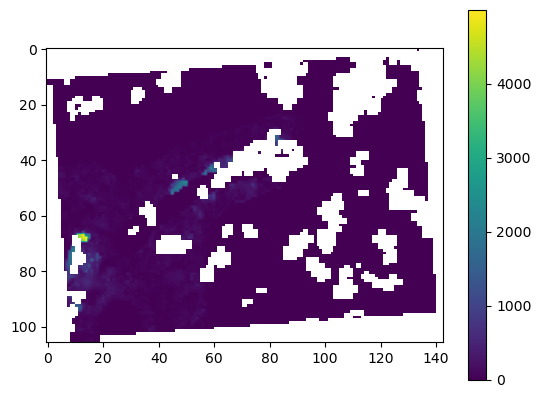

velocity_20200418_20200518_100m_S2.tif


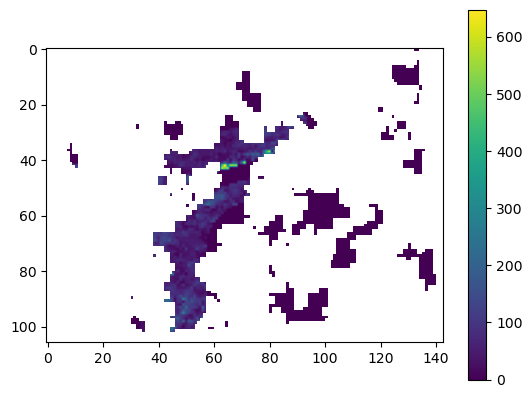

velocity_20200309_20200406_100m_PS.tif


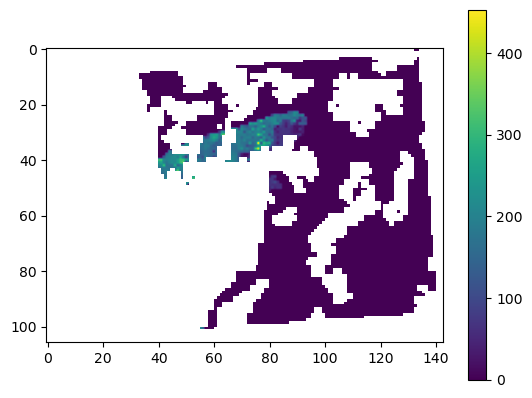

velocity_20211114_20211204_100m_S2.tif


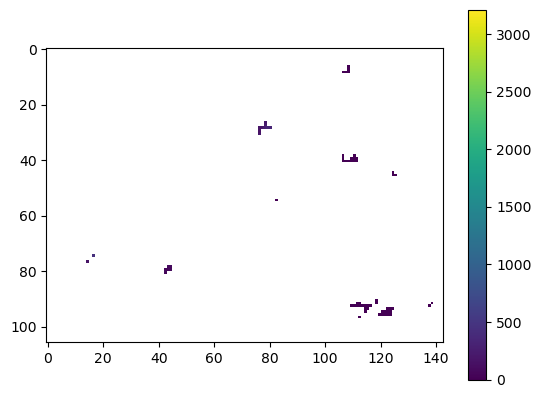

velocity_20201026_20201110_100m_PS.tif


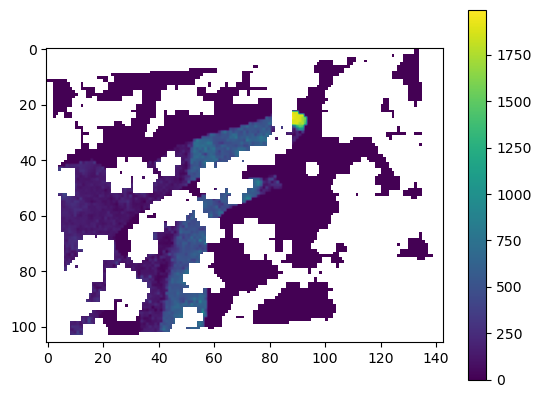

velocity_20220217_20220406_100m_LS.tif


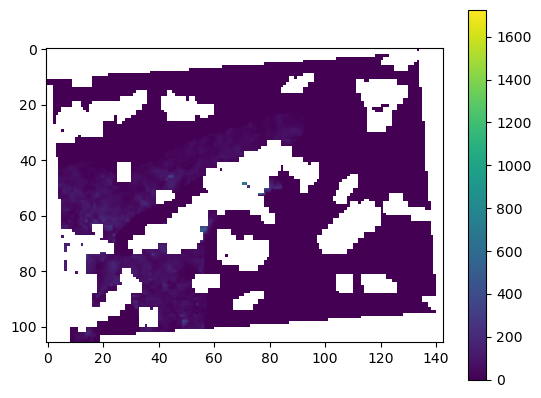

velocity_20200915_20201001_100m_LS.tif


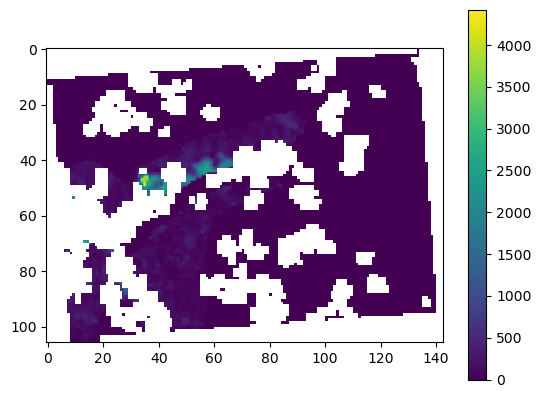

velocity_20211120_20211208_100m_PS.tif


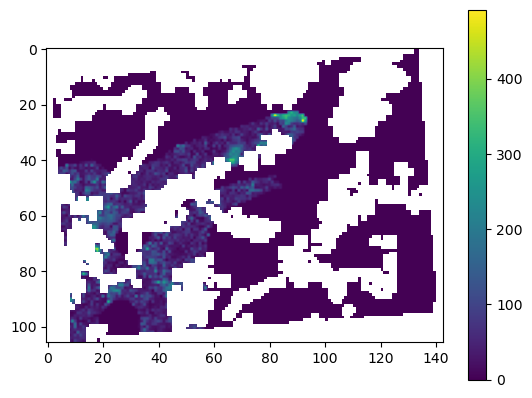

velocity_20200816_20200905_100m_S2.tif


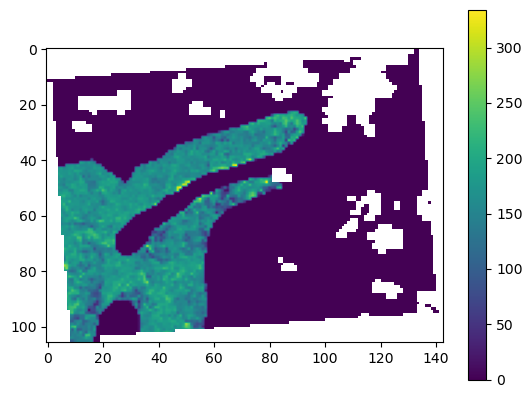

velocity_20220124_20220217_100m_LS.tif


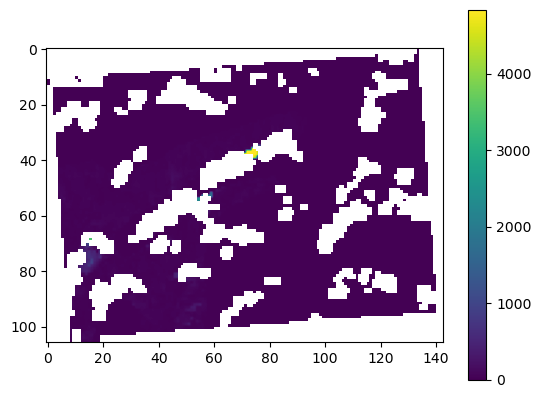

velocity_20200518_20200612_100m_S2.tif


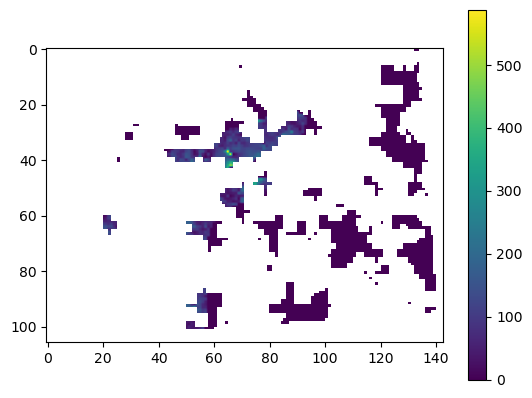

velocity_20200223_20200309_100m_PS.tif


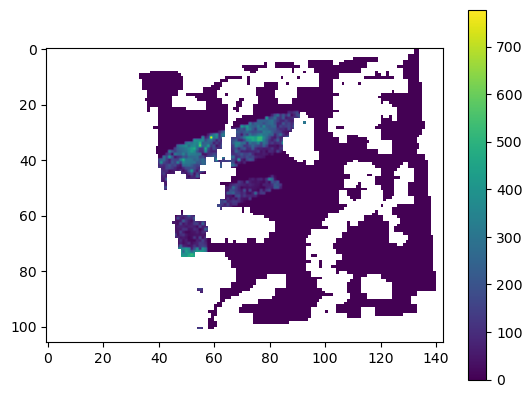

velocity_20190305_20190321_100m_LS.tif


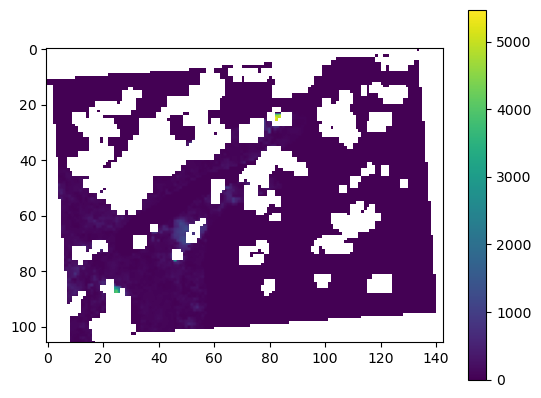

velocity_20201001_20201017_100m_LS.tif


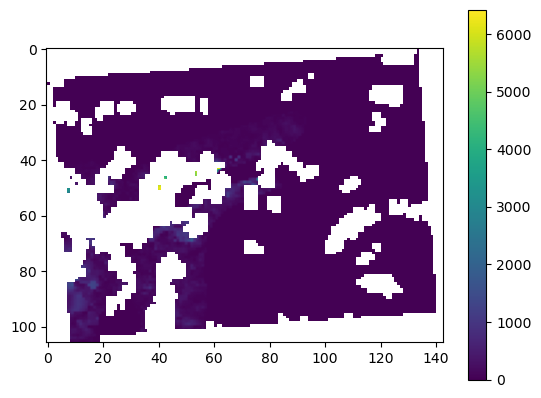

velocity_20210403_20210423_100m_S2.tif


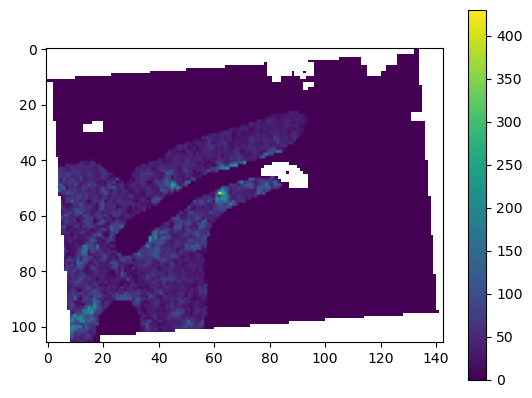

velocity_20200108_20200123_100m_PS.tif


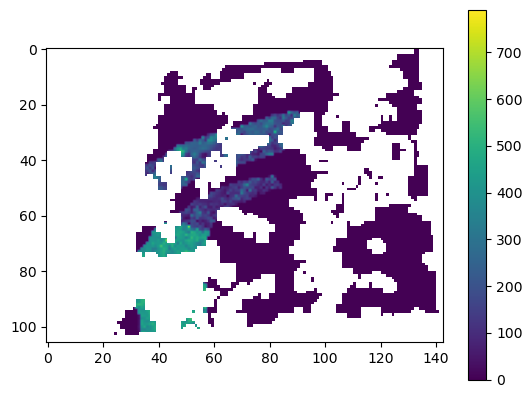

velocity_20210508_20210528_100m_S2.tif


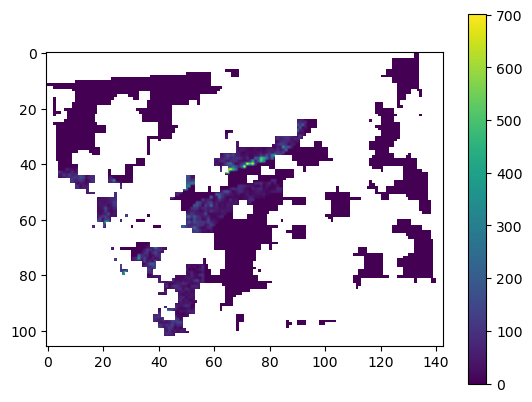

velocity_20200421_20200507_100m_PS.tif


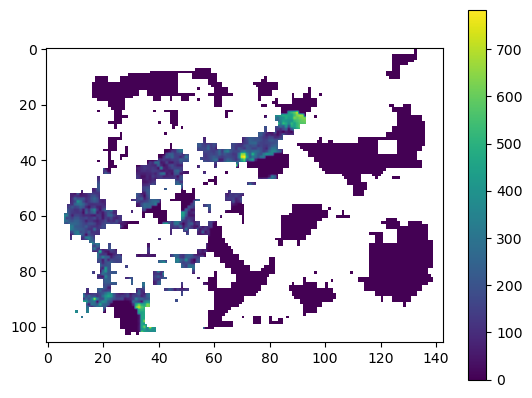

velocity_20220625_20220711_100m_LS.tif


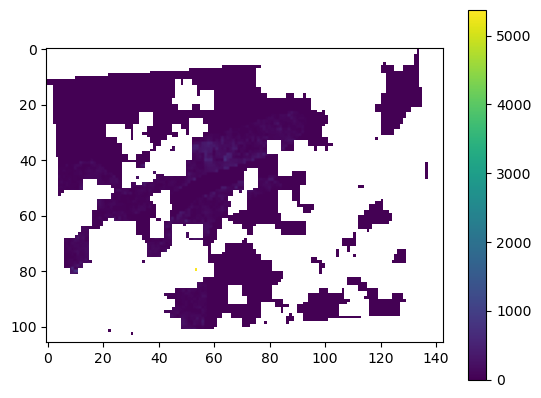

velocity_20210411_20210427_100m_LS.tif


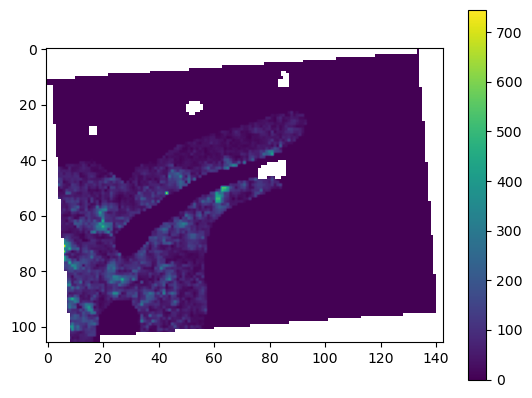

velocity_20220913_20220929_100m_LS.tif


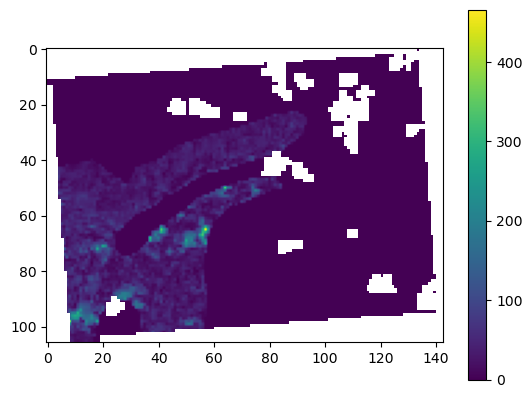

velocity_20200223_20200309_100m_S2.tif


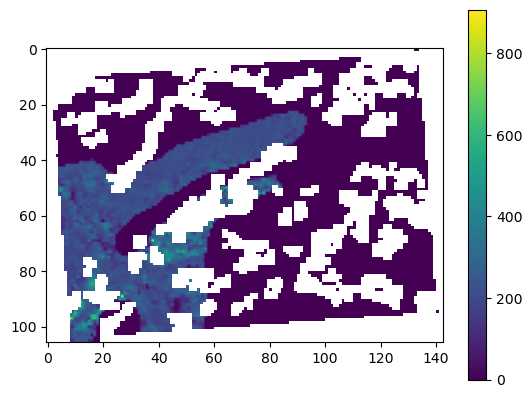

velocity_20210510_20210524_100m_PS.tif


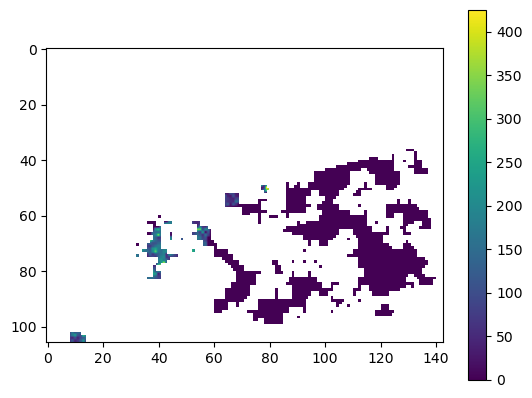

velocity_20210108_20210123_100m_S2.tif


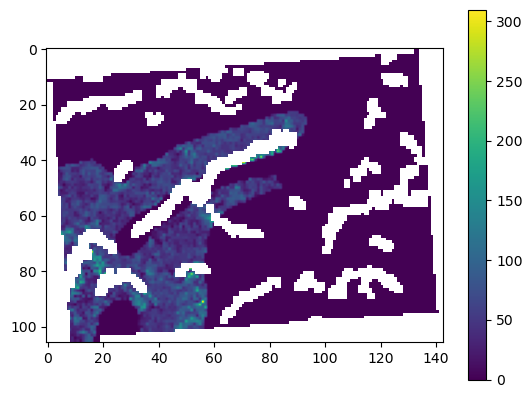

velocity_20210817_20210902_100m_LS.tif


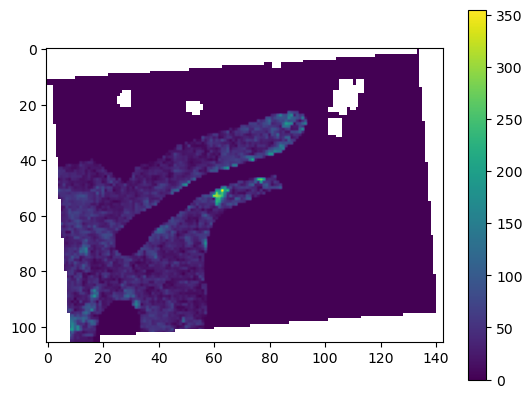

velocity_20200208_20200223_100m_S2.tif


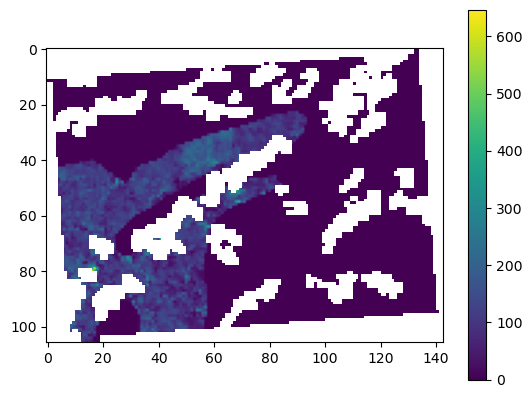

velocity_20220422_20220508_100m_LS.tif


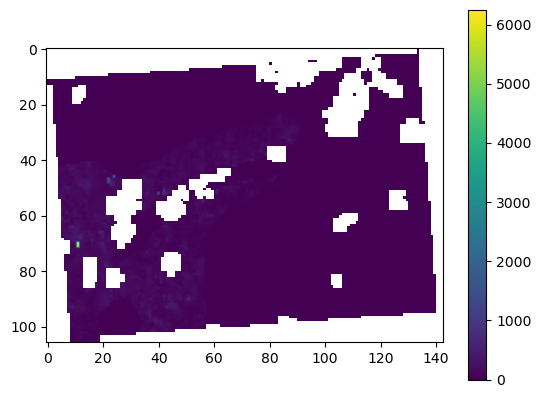

velocity_20200507_20200521_100m_PS.tif


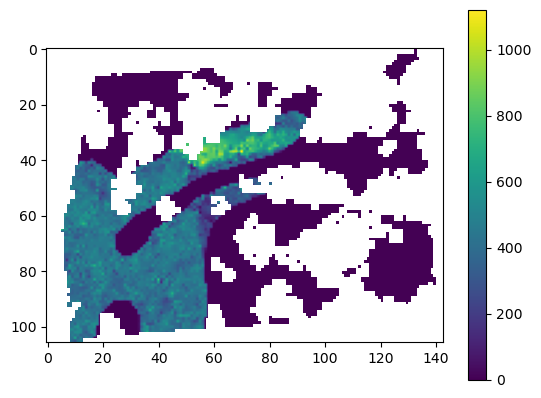

velocity_20210423_20210508_100m_S2.tif


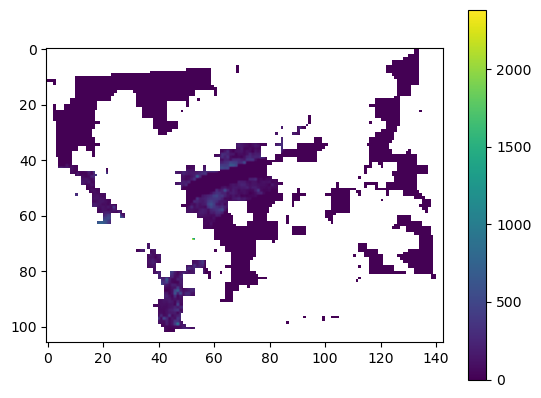

velocity_20220524_20220609_100m_LS.tif


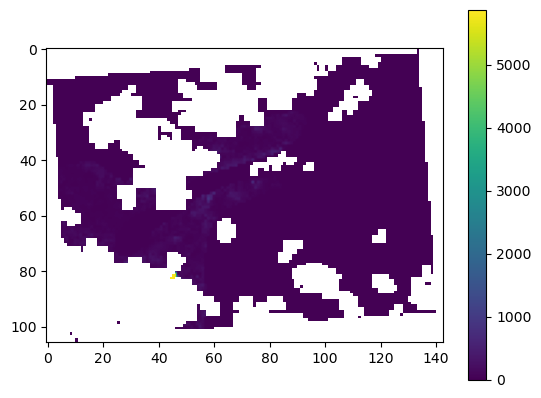

velocity_20200707_20200725_100m_PS.tif


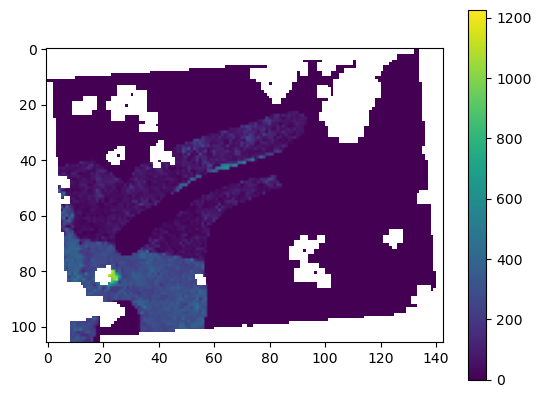

velocity_20201110_20201212_100m_PS.tif


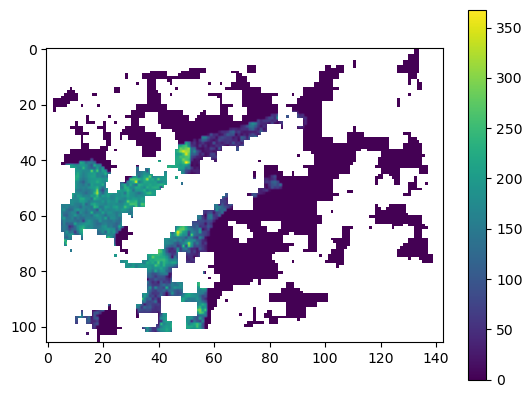

velocity_20200707_20200801_100m_S2.tif


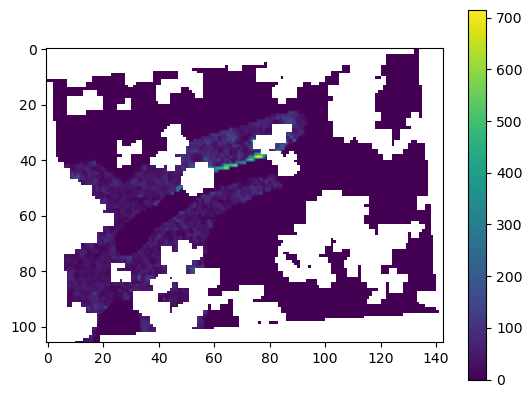

velocity_20210820_20210903_100m_PS.tif


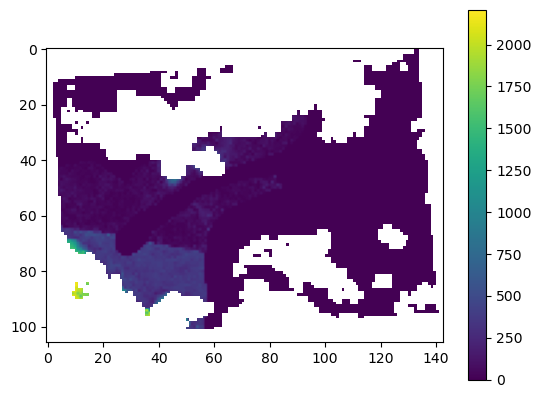

velocity_20220711_20220727_100m_LS.tif


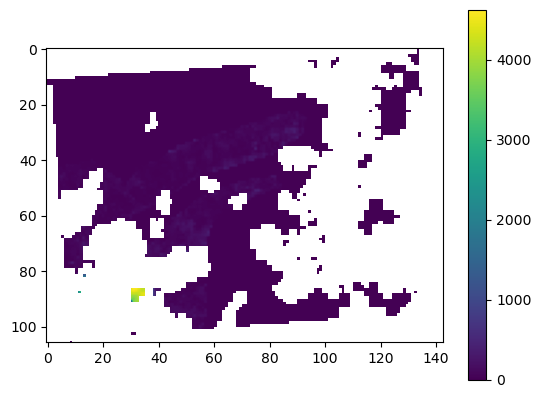

velocity_20220406_20220422_100m_LS.tif


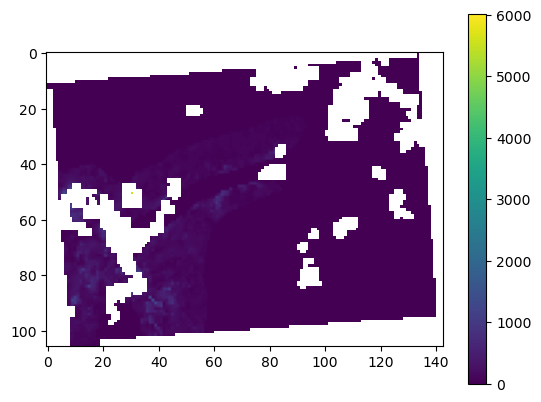

velocity_20210903_20210917_100m_PS.tif


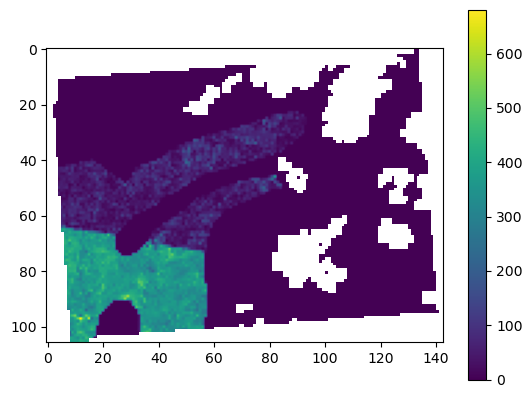

velocity_20210930_20211015_100m_S2.tif


KeyboardInterrupt: 

In [9]:
# initialize lists to store info for each velocity map
ds1s = []; ds2s = []; dts = []; chipsizes = []; sats = []; data_fracs = []; err_vx = []; err_vy = []; err_v = []; 
file_count = 0

# for each velocity map
for output in os.listdir(autorift_outp):
    if output.startswith('velocity') and output.endswith('.tif'): #and not 'S2' in output:
        print(output) # display file names
        [filetype, ds1, ds2, chipsize, sat] = output.split('_') # grab info from filename
        d1 = datetime.datetime.strptime(ds1, '%Y%m%d'); d2 = datetime.datetime.strptime(ds2, '%Y%m%d')
        dt = d2-d1
        sat = sat.split('.')[0] # s
        ds1s.append(ds1); ds2s.append(ds2); dts.append(dt.days)
        chipsizes.append(int(chipsize[:-1])); sats.append(sat)
        
        # read in the velocity map
        v_reader = rio.open(autorift_outp+output)
        vx = v_reader.read(1); vy = v_reader.read(2) # grab vx and vy
        v = np.sqrt(vx**2 + vy**2) # calculate vmag from vx and vy
        # raster grid value (UTM coordinates)
        x_vals = np.arange(v_reader.bounds.left, v_reader.bounds.right+1, v_reader.transform[0])
        y_vals = np.arange(v_reader.bounds.bottom, v_reader.bounds.top+1, v_reader.transform[0])
        
        # Read in stable surface mask
        ssm_reader = rio.open(refvpath+'ssm_'+chipsize+'.tif') # stable surface mask
        ssm = ssm_reader.read(1)
        if ssm.shape != vx.shape:
            ssm = ssm[:vx.shape[0],:vx.shape[1]]
        
        # grab data fraction in glacier outline
        cropped_img, cropped_transform = mask(v_reader, shapes, nodata= -3e5, crop=True)
        if cropped_img.shape[0] == 3:
            cropped_v = cropped_img[2] # grab the third band [2]
        else:
            cropped_vx = cropped_img[0]; cropped_vy = cropped_img[1]
            cropped_v = np.sqrt(cropped_vx**2 + cropped_vy**2) 
        cropped_v_filled = cropped_v.copy()
        cropped_v_filled[np.isnan(cropped_v_filled)] = 0 # fill all Nans with 0
        total_pixels = np.count_nonzero(cropped_v_filled >= 0) # count number of non-nodata values (negative)
        cropped_v[cropped_v < 0] = np.NaN # turn no data values (negative) into NaNs
        pixels_w_data = len(cropped_v[cropped_v >= 0]) # count non Nans (number of pixels with data)
        if pixels_w_data > 0:
            data_percent = int(pixels_w_data/total_pixels*100)
            data_fracs.append(data_percent)
            empty = False
        else:
            data_fracs.append(0)
            empty = True
#         plt.imshow(cropped_v); plt.colorbar(); plt.title(str(data_percent)+' %'); plt.show() # check visually
            
#         # Grab off-ice velocities using stable surface mask
#         ssm[ssm > 0] = 2 # turn ice into 2
#         ssm[ssm == 0] = 1 # turn stable surfaces into 1
#         ssm[ssm == 2] = 0 # turn ice into 0s
        ssm_masked_vx = ssm*vx; ssm_masked_vy = ssm*vy; ssm_masked_v = ssm*v 
        plt.imshow(ssm*v,vmin=0); plt.colorbar(); plt.show()
        # calculate RMSE [m/d]
        err_vx.append(np.sqrt(np.nanmean(ssm_masked_vx**2))/365)
        err_vy.append(np.sqrt(np.nanmean(ssm_masked_vy**2))/365)
        err_v.append(np.sqrt(np.nanmean(ssm_masked_v**2))/365)
        
        # get ready for next iteration
        del v, vx, vy, empty
        file_count += 1
        
print(file_count, 'files found.')

In [12]:
df = pd.DataFrame(list(zip(ds1s, ds2s, chipsizes, sats, dts, data_fracs, err_vx, err_vy, err_v)),
                 columns=['ds1','ds2','min_chip_size','sat','dt_days','data_percent',
                          'err_vx','err_vy','err_v'])
df.sort_values(by=['ds1','min_chip_size','sat'])
df

ds1       ds2  min_chip_size sat  dt_days  data_percent    err_vx  \
0     20210106  20210124            200  PS       18            50  0.063848   
1     20210924  20211123            200  PS       60            40  0.051066   
2     20210120  20210218            200  PS       29            58  0.164289   
3     20200202  20200219            200  PS       17            96  0.250265   
4     20201027  20201120            200  PS       24            75  0.133497   
...        ...       ...            ...  ..      ...           ...       ...   
4091  20200918  20201105            200  PS       48            30  0.101840   
4092  20210518  20210701            200  PS       44            69  0.055965   
4093  20200223  20200314            200  S2       20            80  0.056641   
4094  20210913  20211103            200  PS       51            38  0.073670   
4095  20200123  20200316            200  PS       53            27  0.077891   

        err_vy     err_v  
0     0.057808  0.086129  
1     0.036085  0.062529  
2     0.135050  0.212672  
3     0.334269  0.417575  
4     0.265772  0.297416  
...        ...       ...  
4091  0.049101  0.113059  
4092  0.081204  0.098621  
4093  0.205953  0.213599  
4094  0.090180  0.116446  
4095  0.037930  0.086635  

[4096 rows x 9 columns]

In [13]:
# convert dates to datetime objects
df.ds1 = pd.to_datetime(df.ds1, format='%Y%m%d')
df.ds2 = pd.to_datetime(df.ds2, format='%Y%m%d')
df['mid_date'] = (df.ds2-df.ds1)/2+df.ds1
df = df[df.min_chip_size == 200]
df = df.dropna()
df

ds1        ds2  min_chip_size sat  dt_days  data_percent  \
0    2021-01-06 2021-01-24            200  PS       18            50   
1    2021-09-24 2021-11-23            200  PS       60            40   
2    2021-01-20 2021-02-18            200  PS       29            58   
3    2020-02-02 2020-02-19            200  PS       17            96   
4    2020-10-27 2020-11-20            200  PS       24            75   
...         ...        ...            ...  ..      ...           ...   
4091 2020-09-18 2020-11-05            200  PS       48            30   
4092 2021-05-18 2021-07-01            200  PS       44            69   
4093 2020-02-23 2020-03-14            200  S2       20            80   
4094 2021-09-13 2021-11-03            200  PS       51            38   
4095 2020-01-23 2020-03-16            200  PS       53            27   

        err_vx    err_vy     err_v            mid_date  
0     0.063848  0.057808  0.086129 2021-01-15 00:00:00  
1     0.051066  0.036085  0.062529 2021-10-24 00:00:00  
2     0.164289  0.135050  0.212672 2021-02-03 12:00:00  
3     0.250265  0.334269  0.417575 2020-02-10 12:00:00  
4     0.133497  0.265772  0.297416 2020-11-08 00:00:00  
...        ...       ...       ...                 ...  
4091  0.101840  0.049101  0.113059 2020-10-12 00:00:00  
4092  0.055965  0.081204  0.098621 2021-06-09 00:00:00  
4093  0.056641  0.205953  0.213599 2020-03-04 00:00:00  
4094  0.073670  0.090180  0.116446 2021-10-08 12:00:00  
4095  0.077891  0.037930  0.086635 2020-02-18 12:00:00  

[4057 rows x 10 columns]

### Export CSV to a file

In [14]:
outfilepath = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/error_csvs/MZ_dt14to60_allpairs.csv' # enter path and name of CSV file to save to
df.to_csv(outfilepath)

## Plot errors

In [11]:
# read in csv fiel
df = pd.read_csv('/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/error_csvs/AV_dt5to60_S2.csv')
df.ds1 = pd.to_datetime(df.ds1, format='%Y-%m-%d')
df.ds2 = pd.to_datetime(df.ds2, format='%Y-%m-%d')
df['mid_date'] = (df.ds2-df.ds1)/2+df.ds1
df.head()

Unnamed: 0        ds1        ds2  min_chip_size sat  dt_days  data_percent  \
0           0 2021-09-02 2021-09-07            100  S2        5            85   
1           1 2020-03-16 2020-03-28            100  S2       12            39   
2           2 2021-07-11 2021-07-17            100  S2        6            50   
3           3 2020-06-10 2020-06-15            100  S2        5            10   
4           4 2021-04-03 2021-04-12            100  S2        9            75   

     err_vx    err_vy     err_v            mid_date  
0  0.684871  1.907863  2.027065 2021-09-04 12:00:00  
1  0.398646  0.336156  0.521459 2020-03-22 00:00:00  
2  0.330425  0.233656  0.404692 2021-07-14 00:00:00  
3  0.365693  0.374277  0.523273 2020-06-12 12:00:00  
4  0.362613  0.492910  0.611922 2021-04-07 12:00:00

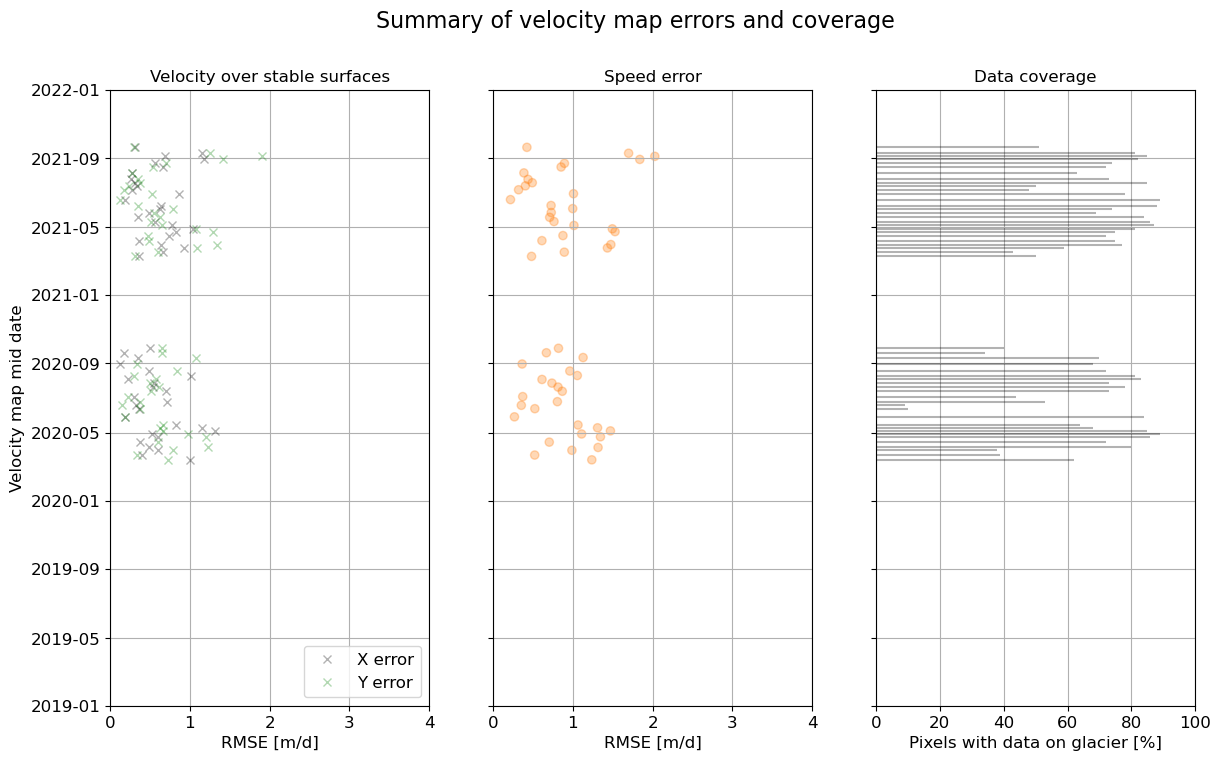

In [12]:
# create subplots with common y-axis
fs = 12
a = 0.3 # control opacity
colors_dict = {'LS':'tab:blue', 'S2':'tab:orange', 'S1':'tab:green', 'PS':'tab:red'}
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(14,8), sharey=True)

# 1) plot velocity residuals over stable surfaces
ax1.set_title("Velocity over stable surfaces", fontsize=fs)
ax1.plot(df.err_vx,df.mid_date, 'kx', alpha=a)
ax1.plot(df.err_vy,df.mid_date, 'gx', alpha=a)
ax1.set_xlim(0, 4)
ax1.set_xlabel('RMSE [m/d]', fontsize=fs); ax1.set_ylabel('Velocity map mid date', fontsize=fs);
ax1.legend(['X error','Y error'], loc='lower right', fontsize=fs)

# 2) plot speed residual of stable surfaces (scaled by max speed)
ax2.set_title("Speed error", fontsize=fs)
ax2.scatter(df.err_v, df.mid_date, c=df.sat.map(colors_dict), alpha=a) # color points by satellite (see colors dict)
ax2.set_xlim(0,4)
ax2.set_xlabel('RMSE [m/d]', fontsize=fs);

# 3) percent coverage on glacier
ax3.set_title("Data coverage")
ax3.hlines(df.mid_date, np.zeros(len(df.data_percent)),df.data_percent, color='k',alpha=a)
ax3.set_xlabel('Pixels with data on glacier [%]', fontsize=fs)
ax3.set_xlim(0,100)

# all plots
for ax in [ax1, ax2, ax3]:
    ax.tick_params(labelsize=fs)
    ax.grid()
    ax.set_ylim(datetime.datetime(2019,1,1), datetime.datetime(2022,1,1))

plt.suptitle('Summary of velocity map errors and coverage', fontsize=fs+4)
plt.savefig('/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/figures/AV_vmap_errors_summary.png',dpi=300)
plt.show()